# Darstellung von H(z) in der z-Ebene

1. Diskretisiertes **RC-Glied** aus der GSV-Vorlesung:
$H\left(z\right)=\frac{0,2}{1-0,8z^{-1} }=\frac{0,2\;z}{z-0,8}$
2. **Gleitender Mittelwert** über fünf Werte:
$H\left(z\right)=\frac{1}{5}\left(1+z^{-1} +z^{-2} +z^{-3} +z^{-4} \right)=\frac{1}{5\;}\cdot \;\frac{1+z+z^2 +z^3 +z^4 }{z^4 }$

3. **Eigene Übertragungsfunktionen**. Nach Eingabe bitte 'Enter' drücken (Achtung: Kein Error-Check!)

Dafür **Beispiele**: z/(z-1),     1/3*(1+z^-1+z^-2),      z\*sin(2\*pi\*0.25)/(z^2-2\*z\*cos(2\*pi\*0.25)+1),...



Output()

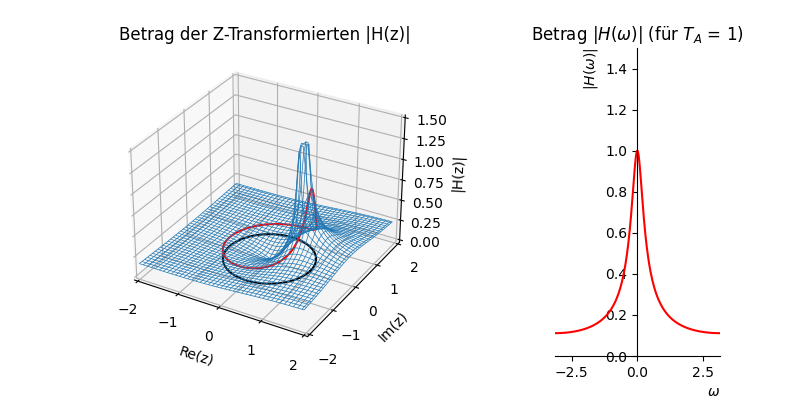

In [15]:
"""
z-Trafo-Demoscript (Matlab-Style)

(c) Benno Dömer | HS Pforzheim 2022-24

"""
import platform
if platform.system() == "Emscripten": # running in JupyterLite
    %pip install -r runtime-requirements.txt

%matplotlib widget 

from numpy import (pi, meshgrid, exp, sqrt, sin, cos, tan, angle, arange, linspace, zeros, ones, NaN, real, imag) # numpy für's Rechnen, bei Bedarf anpassen
from numpy.fft import fft
from matplotlib.pyplot import (figure, plot, stem, legend, text, subplots_adjust, show, 
                               grid, xlabel, ylabel, subplot, subplots, title, clf, cla, xlim, ylim) # matpotlib für's  Plotten, bei Bedarf anpassen
from matplotlib.pyplot import fill_between as area # Beispiel für eine Mapping auf Matlab-Bezeichnung
import ipywidgets as widgets # interaktive Controls wie Slider, Dropdowns etc.
from matplotlib import cm

import numpy as np
np.seterr(divide='ignore', invalid='ignore')

def myplotstyle(ax): # Hilfsfunktion, hübscht den Plot etwas auf
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))

hmax = 1.5; # höhe, ab der für den Plot gekappt wird
amax = 2; # re- und im-Achse werden bis zu +-a berechnet
astep = 0.05; # schrittweite
a_r = arange(-amax,amax,astep); # Achsen/Grid, reele Achse
a_i = arange(-amax,amax,astep); # Achsen/Grid, imaginäre Achse
omega = arange(0,1,0.005)*2*pi;
z_ek = exp(1j*omega);

[zr,zi] = meshgrid(a_r,a_i);
z = zr+1j*zi; # komplexes Grid aufstellen 


#fig = figure(figsize=(7, 4),  layout='constrained', dpi=100,num=' ')
fig = figure(figsize=(8,4), dpi=100,num=' ')
spec = fig.add_gridspec(ncols=2, nrows=1, width_ratios=[2,1])

def plotdata(sigc, sigtxt, ek_only):
    if sigc == 1:
        h = lambda z: 1/5*(1+z+z**2+z**3+z**4)/z**5;# H(z) Moving Average 5 Werte, als Funktionshandle    
    elif sigc == 0: 
        h = lambda z: 0.2 * z/(z-0.8); # H(z) RC-Glied aus VL, als Funktionshandle
    else:
        h = eval('lambda z:' + sigtxt.replace('^','**'))

    abs_h = abs(h(z)); # Betrag bilden
    abs_h[abs_h>hmax]=hmax; # Werte > hmax kappen

    if ek_only:
        abs_h[abs(z)>1]=NaN; # am Einheitskreis schneiden
        
    abs_h_ek = abs(h(z_ek)); 
    abs_h_ek[abs_h_ek>hmax]=NaN; #% Werte > hmax kappen
    clf()

    
    ax1 = fig.add_subplot(spec[0,0],projection='3d')
    ax1.plot_wireframe(zr,zi,abs_h,linewidth=0.5)#,'FaceAlpha','0.5'); # abs(h(z)) plotten
    ax1.plot(real(z_ek),imag(z_ek),zs=0, zdir='z',color='k')#,real(z_ek),imag(z_ek),abs_h_ek,'b'); # Einheitskreis und h(z) am Einheitskreis plotten
    ax1.plot(real(z_ek),imag(z_ek),abs_h_ek,color='red'); # Einheitskreis und h(z) am Einheitskreis plotten
    ax1.set_zlabel('|H(z)|')
    
    xlim(-amax,amax)
    ylim(-amax,amax)
    xlabel('Re(z)')
    ylabel('Im(z)')
    title('Betrag der Z-Transformierten |H(z)|')

    ax2 = fig.add_subplot(spec[0,1])
    omega_sym = arange(-pi,pi,0.01) # symmetrische X-Achse für gewohnte Darstellung
    abs_h_omega = abs(h(exp(1j*omega_sym))); # h für e^jw ausrechnen
    plot(omega_sym, abs_h_omega,'r')
    xlim(-pi,pi)
    xlabel('$\omega$',loc='right')
    ylabel('$|H(\omega)|$',loc='top')
    title('Betrag $|H(\omega)|$ (für $T_A$ = 1)')
    ylim(0,hmax)
    myplotstyle(ax2)
    subplots_adjust(wspace=0.5)
    
    fig.canvas.draw()

    ## Interaktion: 
# Definition von Controls: 
ekcb  = widgets.Checkbox(value=False, description='Schnitt am Einheitskreis')
sigcombo = widgets.Dropdown(options=[('RC-Glied',0),('Gleitender Mittelwert',1),('Eigene Funktion',2)],
                                    value=0,description='Signal')
sigtxt = widgets.Text(value=' 1/3*(1+z**-1+z**-2)',description='Eigene Funktion:',continuous_update=False)


# Arrangieren hier in horizontale Box:
ui1 = widgets.HBox([sigcombo, sigtxt, ekcb])                       

#Verknüpfen mit Callback
out = widgets.interactive_output(plotdata, { 'sigc': sigcombo,'sigtxt': sigtxt,'ek_only':ekcb}) 
#Anzeigen
display(ui1,out)
show()